<a href="https://colab.research.google.com/github/vic37get/predition_base_censo/blob/main/base_censo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from yellowbrick.classifier import ConfusionMatrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
from sklearn.tree import DecisionTreeClassifier

In [ ]:
base

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
base.describe()

,age,final-weight,education-num,capital-gain,capital-loos,hour-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
base[base.isnull()].sum()

age               0.0
workclass         0.0
final-weight      0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loos      0.0
hour-per-week     0.0
native-country    0.0
income            0.0
dtype: float64

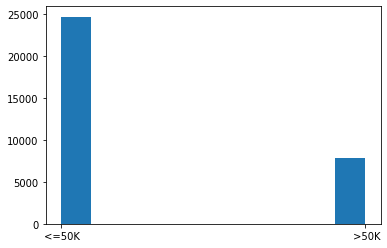

In [ ]:
plt.hist(x = base['income']);

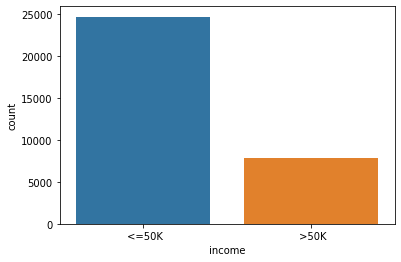

In [ ]:
sns.countplot(x = base['income'])

In [ ]:
np.unique(base['income'], return_counts = True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841]))

In [ ]:
base['income'].count()

32561

In [ ]:
x_base = base.iloc[:,0:14].values

In [ ]:
x_base

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [ ]:
y_base = base.iloc[:,14]

In [ ]:
y_base

0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
32556     <=50K
32557      >50K
32558     <=50K
32559     <=50K
32560      >50K
Name: income, Length: 32561, dtype: object

In [ ]:
x_base[0]

array([39, ' State-gov', 77516, ' Bachelors', 13, ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', 2174, 0, 40,
       ' United-States'], dtype=object)

In [ ]:
label_encoder_trabalho = LabelEncoder()
label_encoder_graduacao = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_ocupacao = LabelEncoder()
label_encoder_relacionamento = LabelEncoder()
label_encoder_cor = LabelEncoder()
label_encoder_sexo = LabelEncoder()
label_encoder_nacionalidade = LabelEncoder()

In [ ]:
x_base[:,1] = label_encoder_trabalho.fit_transform(x_base[:,1])
x_base[:,3] = label_encoder_graduacao.fit_transform(x_base[:,3])
x_base[:,5] = label_encoder_marital.fit_transform(x_base[:,5])
x_base[:,6] = label_encoder_ocupacao.fit_transform(x_base[:,6])
x_base[:,7] = label_encoder_relacionamento.fit_transform(x_base[:,7])
x_base[:,8] = label_encoder_cor.fit_transform(x_base[:,8])
x_base[:,9] = label_encoder_sexo.fit_transform(x_base[:,9])
x_base[:,13] = label_encoder_nacionalidade.fit_transform(x_base[:,13])

In [ ]:
x_base

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)

In [ ]:
onehotenconder_census = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(),[1,3,5,6,7,8,9,13])], remainder='passthrough')

In [ ]:
x_base = onehotenconder_census.fit_transform(x_base).toarray()

In [ ]:
x_base

array([[0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 2.1740e+03, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        1.3000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       ...,
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        4.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        2.0000e+01],
       [0.0000e+00, 0.0000e+00, 0.0000e+00, ..., 1.5024e+04, 0.0000e+00,
        4.0000e+01]])

In [ ]:
x_base[0]

array([0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e

In [ ]:
x_base.shape

(32561, 108)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [ ]:
x_base_treinamento, x_base_teste, y_base_treinamento, y_base_teste = train_test_split(x_base,y_base,test_size=0.15, random_state = 0)

In [ ]:
x_base_treinamento.shape, y_base_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_base_teste.shape, y_base_teste.shape

((4885, 108), (4885,))

# NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
naive_bayes = GaussianNB()

In [ ]:
naive_bayes.fit(x_base_treinamento,y_base_treinamento)

GaussianNB()

In [ ]:
previsao = naive_bayes.predict(x_base_teste)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [ ]:
accuracy_score(y_base_teste, previsao)

0.7949883306719077

0.7949883306719077

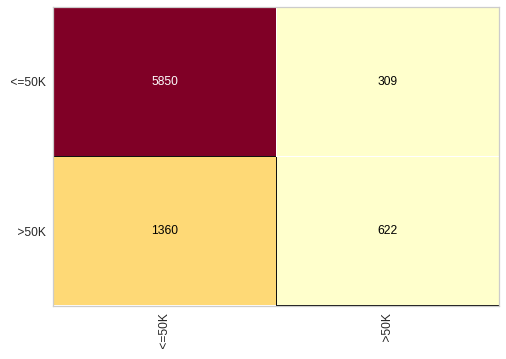

In [ ]:
cm = ConfusionMatrix(naive_bayes)
cm.fit(x_base_treinamento,y_base_treinamento)
cm.score(x_base_teste,y_base_teste)

# RANDOM FOREST

In [ ]:
random_forest_dados = RandomForestClassifier(n_estimators=97, criterion='entropy', random_state=0)
random_forest_dados.fit(x_base_treinamento, y_base_treinamento)


RandomForestClassifier(criterion='entropy', n_estimators=97, random_state=0)

In [ ]:
previsoes = random_forest_dados.predict(x_base_teste)

In [ ]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_base_teste, previsoes)

0.8518609507431519

0.8518609507431519

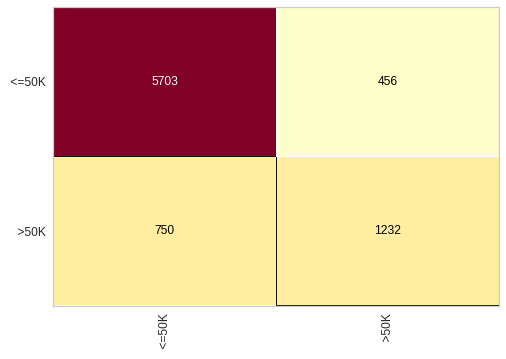

In [ ]:
cm = ConfusionMatrix(random_forest_dados)
cm.fit(x_base_treinamento,y_base_treinamento)
cm.score(x_base_teste,y_base_teste)

In [ ]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90      6159
        >50K       0.73      0.62      0.67      1982

    accuracy                           0.85      8141
   macro avg       0.81      0.77      0.79      8141
weighted avg       0.85      0.85      0.85      8141



# ARVORE DE DECISÃO

In [ ]:
arvore_de_decisao = DecisionTreeClassifier(criterion='entropy',random_state=0)
arvore_de_decisao.fit(x_base_treinamento, y_base_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
previsao = arvore_de_decisao.predict(x_base_teste)
previsao

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' >50K', ' <=50K'],
      dtype=object)

In [ ]:
accuracy_score(y_base_teste, previsao)

0.8169758014985874

0.81722147156369

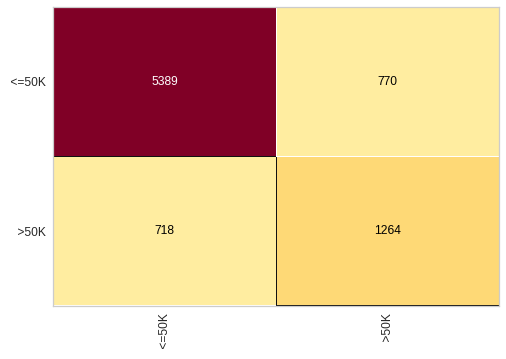

In [ ]:
cm = ConfusionMatrix(arvore_de_decisao)
cm.fit(x_base_treinamento,y_base_treinamento)
cm.score(x_base_teste, y_base_teste)

In [ ]:
print(classification_report(y_base_teste, previsao))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      6159
        >50K       0.62      0.63      0.62      1982

    accuracy                           0.82      8141
   macro avg       0.75      0.75      0.75      8141
weighted avg       0.82      0.82      0.82      8141



# KNN

In [ ]:
x_base_treinamento.shape, y_base_treinamento.shape

((24420, 108), (24420,))

In [ ]:
x_base_teste.shape, y_base_teste.shape

((8141, 108), (8141,))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_census = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
knn_census.fit(x_base_treinamento, y_base_treinamento)

KNeighborsClassifier()

In [ ]:
previsoes = knn_census.predict(x_base_teste)
previsoes

array([' <=50K', ' >50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [ ]:
accuracy_score(y_base_teste, previsoes)

0.7690701388035868

0.7690701388035868

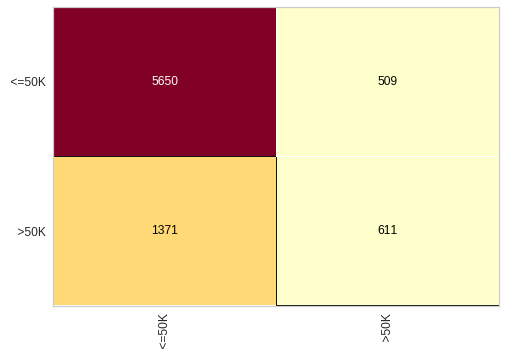

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(knn_census)
cm.fit(x_base_treinamento, y_base_treinamento)
cm.score(x_base_teste,y_base_teste)

In [ ]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.80      0.92      0.86      6159
        >50K       0.55      0.31      0.39      1982

    accuracy                           0.77      8141
   macro avg       0.68      0.61      0.63      8141
weighted avg       0.74      0.77      0.74      8141



# Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
x_base_treinamento.shape, y_base_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_base_teste.shape, y_base_teste.shape

((4885, 108), (4885,))

In [ ]:
regressao_logistica = LogisticRegression(random_state = 0)
regressao_logistica.fit(x_base_treinamento, y_base_treinamento)

LogisticRegression(random_state=0)

In [ ]:
previsoes = regressao_logistica.predict(x_base_teste)

In [ ]:
accuracy_score(y_base_teste, previsoes)

0.7948822927328557

0.7948822927328557

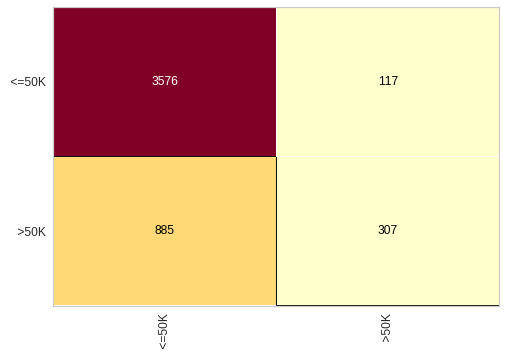

In [ ]:
cm = ConfusionMatrix(regressao_logistica)
cm.fit(x_base_treinamento, y_base_treinamento)
cm.score(x_base_teste, y_base_teste)

In [ ]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.80      0.97      0.88      3693
        >50K       0.72      0.26      0.38      1192

    accuracy                           0.79      4885
   macro avg       0.76      0.61      0.63      4885
weighted avg       0.78      0.79      0.76      4885



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
x_base_treinamento.shape, y_base_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_base_teste.shape, y_base_teste.shape

((4885, 108), (4885,))

In [ ]:
svm_census = SVC(kernel='linear', random_state = 1, C = 2.0)

In [ ]:
svm_census.fit(x_base_treinamento, y_base_treinamento)

SVC(C=2.0, kernel='linear', random_state=1)

In [ ]:
previsoes = svm_census.predict(x_base_teste)

In [ ]:
accuracy_score(y_base_teste, previsoes)

0.8509723643807574

# Redes Neurais

In [ ]:
import pickle
from sklearn.neural_network import MLPClassifier

In [ ]:
x_base_treinamento.shape, y_base_treinamento.shape

((27676, 108), (27676,))

In [ ]:
x_base_teste.shape, y_base_teste.shape

((4885, 108), (4885,))

In [ ]:
rede_neural = MLPClassifier(max_iter=1000, verbose=True, tol=0.000010,
                            solver='adam', activation='relu',
                            hidden_layer_sizes=(55,55))

rede_neural.fit(x_base_treinamento, y_base_treinamento)

Iteration 1, loss = 0.38902423
Iteration 2, loss = 0.32438258
Iteration 3, loss = 0.31385272
Iteration 4, loss = 0.30635978
Iteration 5, loss = 0.30126909
Iteration 6, loss = 0.29728285
Iteration 7, loss = 0.29449798
Iteration 8, loss = 0.29128938
Iteration 9, loss = 0.28824187
Iteration 10, loss = 0.28566411
Iteration 11, loss = 0.28337457
Iteration 12, loss = 0.28090155
Iteration 13, loss = 0.28022932
Iteration 14, loss = 0.27651144
Iteration 15, loss = 0.27535507
Iteration 16, loss = 0.27315216
Iteration 17, loss = 0.27194370
Iteration 18, loss = 0.26942877
Iteration 19, loss = 0.26892891
Iteration 20, loss = 0.26710481
Iteration 21, loss = 0.26550475
Iteration 22, loss = 0.26372607
Iteration 23, loss = 0.26201985
Iteration 24, loss = 0.26076350
Iteration 25, loss = 0.25873930
Iteration 26, loss = 0.25773624
Iteration 27, loss = 0.25597070
Iteration 28, loss = 0.25414652
Iteration 29, loss = 0.25307845
Iteration 30, loss = 0.25111059
Iteration 31, loss = 0.24996984
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(55, 55), max_iter=1000, tol=1e-05,
              verbose=True)

In [ ]:
previsoes = rede_neural.predict(x_base_teste)
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype='<U6')

In [ ]:
accuracy_score(y_base_teste, previsoes)

0.8102354145342886

0.8102354145342886

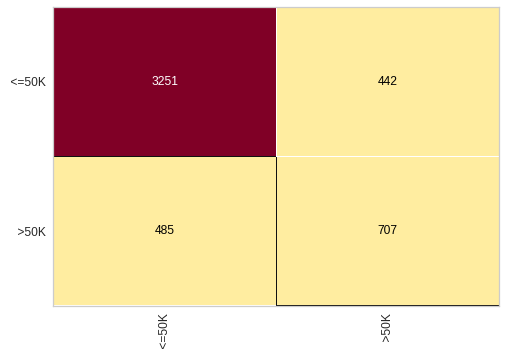

In [ ]:
cm = ConfusionMatrix(rede_neural)
cm.fit(x_base_treinamento, y_base_treinamento)
cm.score(x_base_teste, y_base_teste)

In [ ]:
print(classification_report(y_base_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.87      0.88      0.88      3693
        >50K       0.62      0.59      0.60      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885



# Ajuste de melhores parâmetros para os algoritmos

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
x_base_treinamento.shape, y_base_treinamento.shape

((1500, 3), (1500,))

In [ ]:
x_base_teste.shape, y_base_teste.shape

((500, 3), (500,))

In [ ]:
x_base = np.concatenate((x_base_treinamento, x_base_teste), axis=0)

In [ ]:
y_base = np.concatenate((y_base_treinamento, y_base_teste), axis=0)

In [ ]:
x_base.shape, y_base.shape

((2000, 3), (2000,))

In [ ]:
# Para Árvore de decisão

In [ ]:
parametros = {'criterion': ['gini','entropy'],
              'splitter':['best','random'],
              'min_samples_split':[2, 5, 10, 20, 30],
              'min_samples_leaf': [1, 5, 7, 10, 15]}

In [ ]:
grid_search = GridSearchCV(estimator = DecisionTreeClassifier(), param_grid=parametros)
grid_search.fit(x_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.983


In [ ]:
#Para Random Forest

In [ ]:
parametros = {'n_estimators': [10, 50, 100],
              'criterion': ['gini','entropy'],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 5, 10]}

In [ ]:
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=parametros)
grid_search.fit(x_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'criterion': 'entropy', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.9870000000000001


In [ ]:
#Para o KNN

In [ ]:
parametros = {'n_neighbors': [2, 5, 10, 15, 20],
              'p': [1,2]}

In [ ]:
grid_search = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parametros)
grid_search.fit(x_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'n_neighbors': 15, 'p': 1}
0.984


In [ ]:
#Para Regressão Logística

In [ ]:
parametros = {'tol': [000.1, 0000.1, 00000.1],
              'C': [1.0, 1.5, 2.0],
              'solver': ['lbfgs', 'sag', 'saga']}

In [ ]:
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=parametros)
grid_search.fit(x_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'solver': 'saga', 'tol': 0.1}
0.9490000000000001


In [ ]:
#Para o SVM

In [ ]:
parametros = {'tol': [000.1, 0000.1, 00000.1],
              'C': [1.0, 1.5, 2.0],
              'kernel': ['rbf', 'linear', 'poly', 'sigmoid']}

In [ ]:
grid_search = GridSearchCV(estimator=SVC(), param_grid=parametros)
grid_search.fit(x_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_
print(melhores_parametros)
print(melhor_resultado)

{'C': 2.0, 'kernel': 'rbf', 'tol': 0.1}
0.983


In [ ]:
#Para Redes Neurais

In [ ]:
parametros = {'activation': ['relu', 'logistic', 'tahn'],
              'solver': ['adam', 'sgd'],
              'batch_size': [10, 56]}

In [ ]:
grid_search = GridSearchCV(estimator=MLPClassifier(), param_grid=parametros)
grid_search.fit(x_base, y_base)
melhores_parametros = grid_search.best_params_
melhor_resultado = grid_search.best_score_

In [ ]:
print(melhores_parametros)
print(melhor_resultado)

{'activation': 'relu', 'batch_size': 10, 'solver': 'adam'}
0.9970000000000001


# Validação Cruzada

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
resultados_arvore = []
resultados_random_forest = []
resultados_knn = []
resultados_logistica = []
resultados_svm = []
resultados_rede_neural = []

for i in range(30):
  print(i)
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  arvore = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=1, min_samples_split=5, splitter='best')
  scores = cross_val_score(arvore, x_base, y_base, cv = kfold)
  #print(scores)
  #print(scores.mean())
  resultados_arvore.append(scores.mean())

  random_forest = RandomForestClassifier(criterion = 'entropy', min_samples_leaf = 1, min_samples_split=5, n_estimators = 10)
  scores = cross_val_score(random_forest, x_base, y_base, cv = kfold)
  resultados_random_forest.append(scores.mean())

  knn = KNeighborsClassifier()
  scores = cross_val_score(knn, x_base, y_base, cv = kfold)
  resultados_knn.append(scores.mean())

  logistica = LogisticRegression(C = 1.0, solver = 'lbfgs', tol = 0.0001)
  scores = cross_val_score(logistica, x_base, y_base, cv = kfold)
  resultados_logistica.append(scores.mean())

  svm = SVC(kernel = 'rbf', C = 2.0)
  scores = cross_val_score(svm, x_base, y_base, cv = kfold)
  resultados_svm.append(scores.mean())

  rede_neural = MLPClassifier(activation = 'relu', batch_size = 56, solver = 'adam')
  scores = cross_val_score(rede_neural, x_base, y_base, cv = kfold)
  resultados_rede_neural.append(scores.mean())



In [ ]:
print(resultados_arvore)

[0.9864999999999998, 0.985, 0.9905000000000002, 0.9879999999999999, 0.9879999999999999, 0.9890000000000001, 0.9884999999999999, 0.9875, 0.9855, 0.9869999999999999, 0.9860000000000001, 0.9894999999999999, 0.9889999999999999, 0.9864999999999998, 0.984, 0.9859999999999998, 0.9855, 0.9904999999999999, 0.9875, 0.9869999999999999, 0.985, 0.9865, 0.9884999999999999, 0.9869999999999999, 0.9870000000000001, 0.9884999999999999, 0.9879999999999999, 0.9855, 0.986, 0.9880000000000001]


In [ ]:
resultados = pd.DataFrame({'Arvore': resultados_arvore, 'Random Forest': resultados_random_forest, 'KNN': resultados_knn, 'R.Logistica': resultados_logistica,
                           'SVM': resultados_svm, 'Rede Neural': resultados_rede_neural})
resultados

,Arvore,Random Forest,KNN,R.Logistica,SVM,Rede Neural
0,0.9865,0.9850,0.9815,0.9475,0.9845,0.9965
1,0.9850,0.9815,0.9800,0.9465,0.9840,0.9975
2,0.9905,0.9830,0.9795,0.9470,0.9865,0.9970
3,0.9880,0.9805,0.9780,0.9460,0.9850,0.9970
4,0.9880,0.9810,0.9820,0.9465,0.9850,0.9970
5,0.9890,0.9840,0.9780,0.9465,0.9845,0.9975
6,0.9885,0.9845,0.9805,0.9470,0.9860,0.9975
7,0.9875,0.9850,0.9800,0.9480,0.9850,0.9970
8,0.9855,0.9835,0.9795,0.9465,0.9840,0.9955
9,0.9870,0.9830,0.9820,0.9465,0.9845,0.9975


In [ ]:
resultados.describe()

,Arvore,Random Forest,KNN,R.Logistica,SVM,Rede Neural
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.987233,0.983383,0.980050,0.946950,0.985083,0.997067
std,0.001617,0.002172,0.001533,0.000687,0.001280,0.000568
min,0.984000,0.979500,0.977000,0.945500,0.982000,0.995500
25%,0.986000,0.981500,0.979000,0.946500,0.984125,0.996625
50%,0.987000,0.984000,0.980000,0.947000,0.985000,0.997000
75%,0.988375,0.985000,0.981000,0.947500,0.986375,0.997500
max,0.990500,0.987000,0.982500,0.948500,0.987500,0.998000


In [ ]:
resultados.var()

Arvore           2.616092e-06
Random Forest    4.718678e-06
KNN              2.350862e-06
R.Logistica      4.715517e-07
SVM              1.639368e-06
Rede Neural      3.229885e-07
dtype: float64

In [ ]:
(resultados.std() / resultados.mean()) * 100

Arvore           0.163835
Random Forest    0.220896
KNN              0.156446
R.Logistica      0.072517
SVM              0.129977
Rede Neural      0.056999
dtype: float64